In [83]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [84]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

In [86]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [87]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [88]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [89]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [90]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [100]:
# Find the most recent date in the data set.
lastDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(lastDate)
lastDate = lastDate[0]

('2017-08-23',)


In [106]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
preYear = dt.datetime.strptime(lastDate,'%Y-%m-%d').date() - dt.timedelta(365)

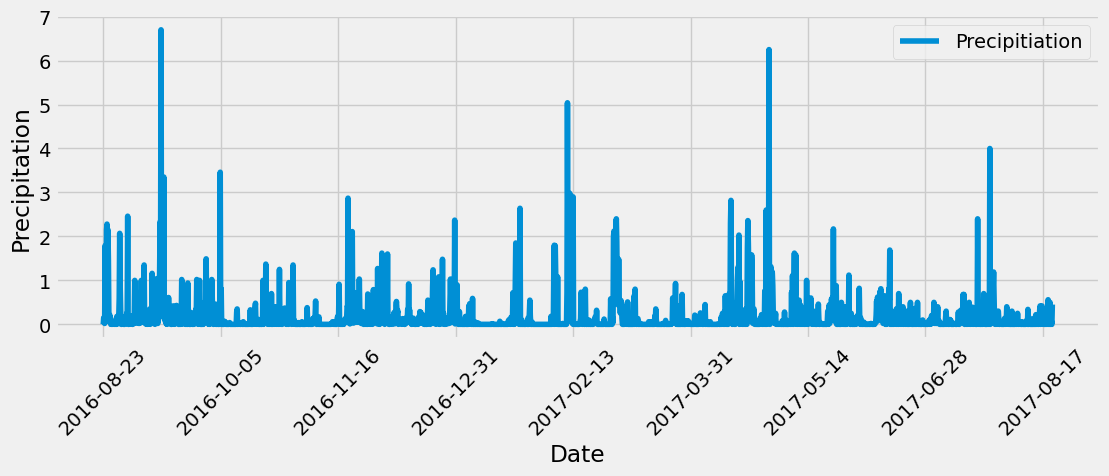

In [127]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.prcp).\
    filter(measurement.date >= preYear).\
    order_by(measurement.date).all()    

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date','Precipitiation']).dropna()

# Sort the dataframe by date
df = df.sort_values('Date').set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45, figsize=[12,4], ylabel='Precipitation');

In [133]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitiation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [170]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()
#session.query(station).count()

[(9,)]

In [146]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
mas = session.query(measurement.station,func.count()).group_by(measurement.station).order_by(func.count().desc()).all()
mas

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [149]:
mas = mas[0][0]

In [153]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [ func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)]
session.query(*sel).filter(measurement.station==mas).all()

[(54.0, 85.0, 71.66378066378067)]

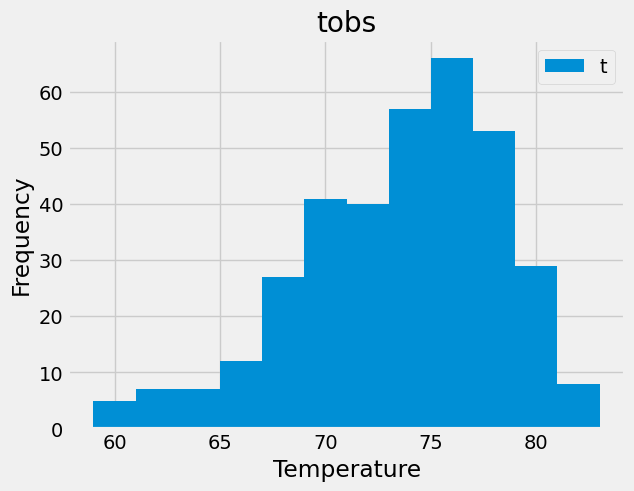

In [167]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).filter((measurement.date>=preYear)&(measurement.station==mas)).all()
pd.DataFrame(results).hist(bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend('tobs')

# Close Session

In [16]:
# Close Session
session.close()